<a id='About'></a>
## About ##
​The National Transport Safety Board (NTSB) aviation accident database contains civil aviation accidents and selected incidents that occurred from 1962 to present within the United States, its territories and possessions, and in international waters. Foreign investigations in which the NTSB participated as an accredited representative will also be listed.  
Data description:
- _Event.Id:_ ID of the aviation event
- _Investigation.Type:_ Determination of avaiation accident. Types are: Accident, Incident, and Occurrence
- _Accident.Number:_ Number of the aviation accident
- _Event.Date:_ The date of the event
- _Location:_ The location in which the event took place
- _Country:_ The country in which the event took place
- _Latitude:_ Latitude where the event took place
- _Longitude:_ Longitude where the event took place
- _Airport.Code:_ Airport code if the event took place within 3 miles of an airport, or the involved aircraft was
taking off from, or on approach to, an airport
- _Airport.Name:_ Airport name if the event took place within 3 miles of an airport, or the involved aircraft was
taking off from, or on approach to, an airport
- _Injury.Severity:_ Type of injury
- _Aircraft.damage:_ Damage level of the involved aircraft
- _Aircraft.Category:_ The category of the involved aircraft
- _Registration.Number:_ The full registration (tail) number of the involved aircraft, including the International Civil Aviation Organization (ICAO) country prefix
- _Make:_ Name of the manufacturer of the involved aircraft
- _Model:_ The full alphanumeric aircraft model code, including any applicable series or derivative
identifiers
- _Amateur.Built:_ Aircraft is a homebuilt (true/false)
- _Number.of.Engines:_ The total number of engines on the accident aircraft
- _Engine.Type:_ A variety of engine types
- _FAR.Description:_ Federal Aviation Regulations description. The applicable regulation part (14 CFR) or authority the aircraft was operating under at the time of the accident
- _Schedule:_ If the accident aircraft was conducting air carrier operations under 14 CFR 121, 125, 129, or
135, indicate whether it was operating as a "scheduled or commuter" air carrier or as a "nonscheduled or air taxi" carrier
- _Purpose.of.flight:_ The purpose of the flight such as Personal, Business, Aerial application and Firefighting flights
- _Air.carrier:_ The organization that operates the involved aircraft
- _Total.Fatal.Injuries:_ Total number of fatal injuries. Fatal injury means any injury which results in death within 30 days of the accident
- _Total.Serious.Injuries:_ Total number of serious injuries
- _Total.Minor.Injuries:_ Total number of minor injuries
- _Total.Uninjured:_ Total number of uninjured
- _Weather.Condition:_ Meteorological Conditions. IMC (Instrument meteorological conditions) and VMC (Visual meteorological conditions)
- _Broad.phase.of.flight:_ Stage of the flight when the event took place
- _Report.Status:_ General status of the investigation
- _Publication.Date:_ The date the investigation report was originally published


<a id='Business Problem'></a>
## Business Problem
The client is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft.  
Our  task is to determine which aircraft are the lowest risk for the company to start this new business endeavor.  
Client needs three concrete recommendations with findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase. 

## Data Understanding
TBD

**Table of contents**  
1. [About](#about)
2. [Business problem & Data understanding](#business-problem)
3. [Data preprocessing](#data-preprocessing)
- 3.1. [Exploring data](#exploring-data)
- 3.2. [Data preparation](#data-preparation)
4. [Exploratory data analysis](#exploratory-data-analysis)
- 4.1. [General data analysis](#general-data-analysis)
- 4.2. [Data analysis for reccommendations](#data-analysis-for-recommendations)
5. [Summary](#summary)

## Data Preprocessing

### Exploring Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")


In [2]:
df = pd.read_csv('data/AviationData.csv', encoding='latin-1')
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50248 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
df.isna().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38641
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7077
Report.Status              6381
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1317
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Event.Date                    0
Accident.Number               0
Investigation.Type            0
Event.Id                      0
dtype: i

In [5]:
round((df.isna().sum().sort_values(ascending = False) / df.shape[0] * 100), 2).to_frame("%")

,%
Schedule,85.85
Air.carrier,81.27
FAR.Description,63.97
Aircraft.Category,63.68
Longitude,61.33
Latitude,61.32
Airport.Code,43.47
Airport.Name,40.61
Broad.phase.of.flight,30.56
Publication.Date,15.49


In [6]:
df.duplicated().sum()

0

1. We have a dataset of 88889 rows and 31 columns
2. 5 columns have float64 data type, 26 columns - object data type
3. No duplicates found
4. Uninformative columns (based on our task) to be deleted.  
Such as: Schedule, Air.carrier, FAR.Description, Airport.Code, Airport.Name, Publication.Date, Purpose.of.flight, Registration.Number, Longitude, Latitude, Location, Country, Report.Status, Accident.Number, Event.ID
4. Injury.Severity duplicates Total.Fatal.Injuries, Total.Minor.Injuries, Total.Serious.Injuries  
and Total.Uninjured. Injury.Severity to be deleted
4. Data in dataframe to be converted into lowercase type where needed
5. Name of columns to be converted into snake style
6. Column Event.Date to be converted to datetime type
8. Columns: Number.of.Engines,Total.Fatal.Injuries, Iotal.Minor.Injuries, Total.Serious.Injuries, Total.Uninjured  to be converted to integer data type
11. Almost all the columns, except Event.Date, Accident.Number, Investigation.Type ,Event.Id, have missing values. Analyse them and find solution for missing values
12. Add new columns if needed






### Data Preparation

Dropping all the non-informative columns

In [7]:
df = df.drop(['Accident.Number', 'Schedule', 'Air.carrier',
              'FAR.Description', 'Airport.Code', 'Airport.Name',
              'Publication.Date', 'Purpose.of.flight', 
              'Registration.Number', 'Event.Id', 'Accident.Number',
              'Longitude', 'Latitude', 'Report.Status',
              'Location', 'Country', 'Injury.Severity'], axis=1)

Correcting names of the columns

In [8]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('.', '_')

Converting column 'event_date' to datetime data type

In [9]:
df['event_date'] = pd.to_datetime(df['event_date'], format='%Y-%m-%d')

Extracting the year, month, and day components from 'event_date'  
Adding new columns

In [10]:

df['event_year'] = df['event_date'].dt.year
df['event_month'] = df['event_date'].dt.month
df['event_day'] = df['event_date'].dt.dayofweek

In [11]:
df.head()

,investigation_type,event_date,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,event_year,event_month,event_day
0,Accident,1948-10-24,Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,1948,10,6
1,Accident,1962-07-19,Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,1962,7,3
2,Accident,1974-08-30,Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,1974,8,4
3,Accident,1977-06-19,Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,1977,6,6
4,Accident,1979-08-02,Destroyed,NaN,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach,1979,8,3


Checking unique values of the dataframe columns

In [12]:
for index in df:
    print(index,":", df[index].unique())

investigation_type : ['Accident' 'Incident']
event_date : ['1948-10-24T00:00:00.000000000' '1962-07-19T00:00:00.000000000'
 '1974-08-30T00:00:00.000000000' ... '2022-12-22T00:00:00.000000000'
 '2022-12-26T00:00:00.000000000' '2022-12-29T00:00:00.000000000']
aircraft_damage : ['Destroyed' 'Substantial' 'Minor' nan 'Unknown']
aircraft_category : [nan 'Airplane' 'Helicopter' 'Glider' 'Balloon' 'Gyrocraft' 'Ultralight'
 'Unknown' 'Blimp' 'Powered-Lift' 'Weight-Shift' 'Powered Parachute'
 'Rocket' 'WSFT' 'UNK' 'ULTR']
make : ['Stinson' 'Piper' 'Cessna' ... 'JAMES R DERNOVSEK' 'ORLICAN S R O'
 'ROYSE RALPH L']
model : ['108-3' 'PA24-180' '172M' ... 'ROTORWAY EXEC 162-F' 'KITFOX S5'
 'M-8 EAGLE']
amateur_built : ['No' 'Yes' nan]
number_of_engines : [ 1. nan  2.  0.  3.  4.  8.  6.]
engine_type : ['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'None' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR'
 'NONE' 'UNK']
total_fatal_injuries : [  2.   4.   3.   1.  

Droppin missing values in 'amateur_built'

In [13]:
df['amateur_built'] = df['amateur_built'].dropna()

Converting strings in 'weather_condition' into lowercase

In [14]:
df['weather_condition'] = df['weather_condition'].str.lower()

In [15]:
df['weather_condition'].unique()

array(['unk', 'imc', 'vmc', nan], dtype=object)

Filling up missing values with "unk"(Unknown) value

In [16]:
df['weather_condition'] = df['weather_condition'].fillna('unk')

Filling missing values of 'broad_phase_of_flight' with 'Unknown' value

In [17]:
df['broad_phase_of_flight'] = df['broad_phase_of_flight'].fillna('Unknown')

Exploring missing values of 'make'

In [18]:
df['make'].value_counts().head(10)

Cessna     22227
Piper      12029
CESSNA      4922
Beech       4330
PIPER       2841
Bell        2134
Boeing      1594
BOEING      1151
Grumman     1094
Mooney      1092
Name: make, dtype: int64

Converting to lower type to avoid duplicates

In [19]:
df['make'] = df['make'].str.lower()

Dropping missing values

In [20]:
df.dropna(subset=['make'], inplace=True)

Exploring missing values of 'model'

In [21]:
df['model'].value_counts()

152             2367
172             1756
172N            1164
PA-28-140        932
150              829
                ... 
8-W Modified       1
BU 133             1
SZD 50-3           1
HH43 B/F           1
PA32-300D          1
Name: model, Length: 12310, dtype: int64

Converting to lower type to avoid duplicates

In [22]:
df['model'] = df['model'].str.lower()

Dropping missing values

In [23]:
df.dropna(subset=['model'], inplace=True)

Exploring missing values of 'aircraft_damage'

In [24]:
df['aircraft_damage'].value_counts()

Substantial    64097
Destroyed      18597
Minor           2792
Unknown          119
Name: aircraft_damage, dtype: int64

Filling  missing values with 'Unknown' value

In [25]:
df['aircraft_damage'] = df['aircraft_damage'].fillna('Unknown')

Dropping all missing values in 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured'

In [26]:
df = df.dropna(subset=['total_fatal_injuries', 'total_serious_injuries', 
                       'total_minor_injuries', 'total_uninjured'])

Converting the columns above into integer data type

In [27]:
df['total_fatal_injuries'] = df['total_fatal_injuries'].astype('int64')
df['total_serious_injuries'] = df['total_serious_injuries'].astype('int64')
df['total_minor_injuries'] = df['total_minor_injuries'].astype('int64')
df['total_uninjured'] = df['total_uninjured'].astype('int64')

Checking how many airplanes we have before cleaning 

In [28]:
airplane_before = df['aircraft_category'].value_counts()
airplane_before

Airplane             24115
Helicopter            2999
Glider                 420
Balloon                192
Weight-Shift           161
Gyrocraft              153
Powered Parachute       91
Ultralight              24
Unknown                 14
WSFT                     9
UNK                      2
Powered-Lift             2
ULTR                     1
Rocket                   1
Blimp                    1
Name: aircraft_category, dtype: int64

Defining a function that is going to fill up missing values of 'aircraft_category' based on mode value in 'model' 

In [29]:
def aircraft(row):
    if type(row['aircraft_category']) == str:
        return row['aircraft_category']

    else:
        mode_aircraft = df.loc[df['model'] == row['model'], 'aircraft_category'].mode()
        return mode_aircraft.iloc[0] if not mode_aircraft.empty else 'Unknown'


Apply the function to each row

In [30]:
df['aircraft_category'] = df.apply(aircraft, axis=1)

Checking how many airplanes we have after cleaning the correspondent column

In [31]:
airplane_after = df['aircraft_category'].value_counts()
airplane_after

Airplane             59253
Unknown               7197
Helicopter            6073
Glider                 820
Balloon                393
Gyrocraft              230
Weight-Shift           169
Powered Parachute       92
Ultralight              27
WSFT                     9
UNK                      2
Powered-Lift             2
ULTR                     1
Rocket                   1
Blimp                    1
Name: aircraft_category, dtype: int64

In [32]:
print("before:", airplane_before.index[0], airplane_before.values[0])
print("after:", airplane_after.index[0], airplane_after.values[0])
print("change ratio:", round((airplane_after.values[0] / airplane_before.values[0]), 2))

before: Airplane 24115
after: Airplane 59253
change ratio: 2.46


Defining a function that is going to fill up missing values of 'number_of_engines' based on mean value in 'model' 

In [33]:
# def numbers(row):
#     if row['number_of_engines'] >= 0:
#         return row['number_of_engines']
#     else:
#         mean_engines = df.loc[df['model'] == row['model'], 'number_of_engines'].mean()
#         return round(mean_engines) if not np.isnan(mean_engines) else 'Unknown'

In [34]:
def numbers(row):
    if row['number_of_engines'] >= 0:
        return row['number_of_engines']
    else:
        mean_engines = df.loc[df['model'] == row['model'], 'number_of_engines'].mean()

        if not np.isnan(mean_engines):
            return round(mean_engines)
        else:
            return 'Unknown'

Apply the function to each row

In [35]:
df['number_of_engines'] = df.apply(numbers, axis=1)

Deleting "Unknown' values and converting data into integer data type

In [36]:
df = df[df['number_of_engines'] != 'Unknown']
df['number_of_engines'] = df['number_of_engines'].astype('int64')

In [37]:
df['number_of_engines'].value_counts()

1    60478
2    10589
0     1463
3      461
4      429
8        3
6        1
Name: number_of_engines, dtype: int64

Defining a function that is going to fill up missing values of 'engine_type' based on mode value in 'model'.  


In [38]:
def engines(row):
    if type(row['engine_type']) == str:
        return row['engine_type']

    else:
        mode_engine = df.loc[df['model'] == row['model'], 'engine_type'].mode()
        return mode_engine.iloc[0] if not mode_engine.empty else 'Unknown'


Apply the function to each row

In [39]:
df['engine_type'] = df.apply(engines, axis=1)

Replacing implicit duplicates

In [40]:
df['engine_type'].unique()

array(['Reciprocating', 'Turbo Shaft', 'Unknown', 'Turbo Fan',
       'Turbo Prop', 'Turbo Jet', 'NONE', 'None', 'Electric',
       'Hybrid Rocket', 'Geared Turbofan', 'LR', 'UNK'], dtype=object)

In [41]:
df['engine_type'] = df['engine_type'].replace("UNK", "Unknown")
df['engine_type'] = df['engine_type'].replace("NONE", "None")


In [42]:
df['engine_type'].unique()

array(['Reciprocating', 'Turbo Shaft', 'Unknown', 'Turbo Fan',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR'], dtype=object)

In [43]:
df.isna().sum()

investigation_type        0
event_date                0
aircraft_damage           0
aircraft_category         0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
event_year                0
event_month               0
event_day                 0
dtype: int64

Cheking whether we have duplicates after we have processed data

In [44]:
df.duplicated().sum()

139

In [45]:
df = df.drop_duplicates()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73285 entries, 0 to 88888
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   investigation_type      73285 non-null  object        
 1   event_date              73285 non-null  datetime64[ns]
 2   aircraft_damage         73285 non-null  object        
 3   aircraft_category       73285 non-null  object        
 4   make                    73285 non-null  object        
 5   model                   73285 non-null  object        
 6   amateur_built           73285 non-null  object        
 7   number_of_engines       73285 non-null  int64         
 8   engine_type             73285 non-null  object        
 9   total_fatal_injuries    73285 non-null  int64         
 10  total_serious_injuries  73285 non-null  int64         
 11  total_minor_injuries    73285 non-null  int64         
 12  total_uninjured         73285 non-null  int64 

- The uninformative columns were dropped
- Names of the columns were converted to snake style
- 'event_date' was converted to datetime data
- 'event_year', 'event_month', 'event_day' were created
- 'weather_condition', 'aircraft_damage', 'broad_phase_of_flight'  
missing values were filled with 'unknown' value
- missing values of 'make' and 'model' were dropped.  
all the values were converted to lower in order to avoid duplicates
- 'aircraft_category', 'engine_type' missing values were filled with mode value in 'model'
- 'number_of_engines' missing values were filled with mean value in 'model'.  
- 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries',  
 'total_uninjured', 'number_of_engines' were converted to integer data type
- duplicated rows were dropped


## Exploratory Data Analysis

Copy data for analysis

In [47]:
df_clean = df.copy()

### General Data Analysis

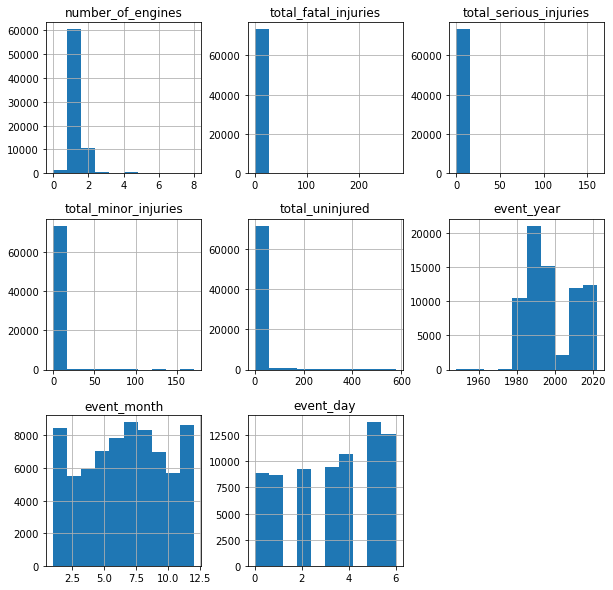

In [48]:

df_clean.hist(figsize=(10,10));

In [49]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_engines,73285.0,1.154902,0.469581,0.0,1.0,1.0,1.0,8.0
total_fatal_injuries,73285.0,0.487167,3.883548,0.0,0.0,0.0,0.0,270.0
total_serious_injuries,73285.0,0.240786,1.452019,0.0,0.0,0.0,0.0,161.0
total_minor_injuries,73285.0,0.299925,1.544518,0.0,0.0,0.0,0.0,171.0
total_uninjured,73285.0,4.731664,25.830192,0.0,0.0,1.0,2.0,576.0
event_year,73285.0,1998.258607,12.727533,1948.0,1987.0,1995.0,2011.0,2022.0
event_month,73285.0,6.587037,3.055980,1.0,4.0,7.0,9.0,12.0
event_day,73285.0,3.310923,2.008895,0.0,2.0,4.0,5.0,6.0


In [50]:
df_clean.describe(include=[object]).T

,count,unique,top,freq
investigation_type,73285,2,Accident,70210
aircraft_damage,73285,4,Substantial,52918
aircraft_category,73285,14,Airplane,58766
make,73285,6223,cessna,22898
model,73285,9487,152,2084
amateur_built,73285,2,No,66553
engine_type,73285,11,Reciprocating,61294
weather_condition,73285,3,vmc,63777
broad_phase_of_flight,73285,12,Unknown,25566


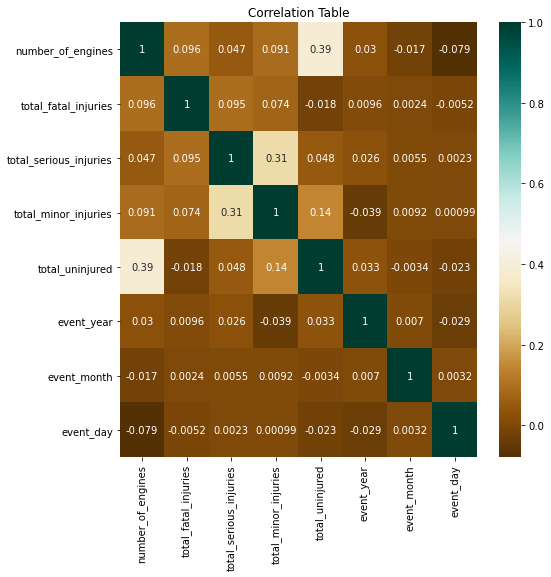

In [51]:
plt.figure(figsize=(8,8))
sns.heatmap(df_clean.corr(), annot=True,cmap='BrBG')
plt.title('Correlation Table');

Based on general analysis, we can conclude that:
- There is no clear correlation between values
- There is an abrupt decline of aircraft events after 2001 that is related with 9/11

The picture of an average aircraft event looks as below:
- It took place in 1998 in June-July in the middle of week under visual meteorological conditions
- It was a Cessna 152 airplane with 1 reciprocating (piston) engine that was used for personal or training purposes  
- The event was qualified as an accident with substantial aircraft damage with 1 fatal unjury
- No clear ackowledgement during which broad phase of flight it happened


### Data Analysis for recommendations

 
Before starting Analysis, we adjust our dataset based on client's task.
1. The purchase of aircraft  
- a successful production run = 15-20 years
- aircraft lifetime = 25-35 years
2. The type of aircraft is airplane
3. We choose top 10 commercial and private manufacturers based on revenue ([Source](https://assetsamerica.com/aircraft-manufacturers/)).  
Commercial manufactures that have private production are counted as commercial only.  
Due to Piper is a top in the column 'make', we also include it in our private_top list
4. We delete engine type "turbo shaft" that is used in helicopters only

Based on this information above we are exploring data starting from 2003-01-01

In [52]:
df_clean = df_clean[df_clean['event_date'] > '2003-01-01']

Selecting only airplane

In [53]:
df_clean = df_clean[df_clean['aircraft_category'] == 'Airplane']

Selecting only no homebuilt

In [54]:
df_clean = df_clean[df_clean['amateur_built'] == 'No']

In [55]:
df_clean = df_clean[df_clean['engine_type'] != 'Turbo Shaft']

Defining function that finds implicit duplicates in 'make' column

In [56]:
def filter_make(word):
    filtered_df = df_clean[df_clean['make'].str.contains(word, case=False, na=False)]
    return print(filtered_df['make'].value_counts())

In [57]:
filter_make('boeing')
filter_make('airbus')
filter_make('embraer')
filter_make('bombardier')
filter_make('mitsubishi')
filter_make('uac')
filter_make('aviastar')
filter_make('kapa')
filter_make('gipps')
filter_make('beech')
filter_make('ces')
filter_make('dassault')
filter_make('gulfstream')
filter_make('piper')



boeing                            1180
the boeing company                   9
boeing company                       9
boeing commercial airplane gro       1
boeing-stearman                      1
boeing 777-306er                     1
boeing of canada/dehav div           1
boeing (stearman)                    1
Name: make, dtype: int64
airbus              237
airbus industrie     29
Name: make, dtype: int64
embraer                           134
embraer s a                         9
embraer-empresa brasileira de       6
embraer s.a.                        2
embraer sa                          1
embraer aircraft                    1
embraer executive aircraft inc      1
Name: make, dtype: int64
bombardier inc              68
bombardier                  49
bombardier, inc.             7
bombardier canadair          1
bombardier learjet corp.     1
Name: make, dtype: int64
mitsubishi    17
Name: make, dtype: int64
Series([], Name: make, dtype: int64)
Series([], Name: make, dtype: int64)
Ser

Among top 10 commercial manufacturers only 5 are presented in actual dataset.  
The rest 5 are all international companies: 
- Comac: China. No commercial flights outside China yet.
- UAC, Aviastar_SP, KAPA: Russia. No international commercial flights.
- GippsAero: Australia. In 2021 converted into a Spares and Support Organization.

In [58]:
commercial_top_5 = ['boeing', 'airbus', 'embraer', 
                    'bombardier', 'mitsubishi']
private_top_5 = ['beechcraft', 'cessna', 'dassault', 
                    'gulfstream', 'piper']

Replacing implicit dublicates

In [59]:
def duplicates_make(row):
    try:
        if 'boeing' in row:
            return 'boeing'
        elif 'airbus' in row:
            return 'airbus'
        elif 'embraer' in row:
            return 'embraer'
        elif 'bombardier' in row:
            return 'bombardier'
        elif 'mitsubishi' in row:
            return 'mitsubishi'
        elif 'beech' in row:
            return 'beechcraft'
        elif 'cessna' in row:
            return 'cessna'
        elif 'dassault' in row:
            return 'dassault'
        elif 'gulfstream' in row:
            return 'gulfstream'
        elif 'piper' in row:
            return 'piper'
    except:
        return 'others'

In [60]:
df_clean['make_top'] = df_clean['make'].apply(duplicates_make)
df_clean['make_top'].value_counts()

cessna        5946
piper         3505
beechcraft    1330
boeing        1203
airbus         266
embraer        154
bombardier     126
gulfstream      68
mitsubishi      17
dassault        17
Name: make_top, dtype: int64

In [61]:
df_clean = df_clean.dropna(subset=['make_top'], axis=0)
df_clean = df_clean[df_clean['make_top'] != "others"]

In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12632 entries, 54065 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   investigation_type      12632 non-null  object        
 1   event_date              12632 non-null  datetime64[ns]
 2   aircraft_damage         12632 non-null  object        
 3   aircraft_category       12632 non-null  object        
 4   make                    12632 non-null  object        
 5   model                   12632 non-null  object        
 6   amateur_built           12632 non-null  object        
 7   number_of_engines       12632 non-null  int64         
 8   engine_type             12632 non-null  object        
 9   total_fatal_injuries    12632 non-null  int64         
 10  total_serious_injuries  12632 non-null  int64         
 11  total_minor_injuries    12632 non-null  int64         
 12  total_uninjured         12632 non-null  in

Creating column 'make_type' to separate private and commercial manufacturers

In [63]:
df_clean['make_type'] = df_clean['make_top'].apply(lambda x: 'commercial' if x in commercial_top_5 else 'private' if x in private_top_5 else 'other')
df_clean['make_type'].value_counts()

private       10866
commercial     1766
Name: make_type, dtype: int64

Creating column 'total onboard' to calculate percentage of fatalities and minor injuries

In [64]:
df_clean['total_onboard'] = df_clean['total_fatal_injuries'] + df_clean['total_serious_injuries'] + df_clean['total_minor_injuries'] + df_clean['total_uninjured']

In [65]:
df_clean['fatal_percentage'] = (df_clean["total_fatal_injuries"]/df_clean['total_onboard']) * 100

In [66]:
df_clean['minor_injuries_percentage'] = (df_clean["total_minor_injuries"]/df_clean['total_onboard']) * 100

Dropping columns 'aircraft_category' and 'amateur_built' because they have one value only

In [67]:
df_clean = df_clean.drop(columns=['amateur_built','aircraft_category'])

Splitting dataframe into 2: private and commercial

In [68]:
df_private = df_clean[df_clean['make_type'] == 'private']
df_commercial = df_clean[df_clean['make_type'] != 'private']

Starting exploring these datasets

In [69]:
round((df_private.describe().T),2)


,count,mean,std,min,25%,50%,75%,max
number_of_engines,10866.0,1.15,0.37,0.0,1.0,1.0,1.0,3.0
total_fatal_injuries,10866.0,0.46,1.17,0.0,0.0,0.0,0.0,21.0
total_serious_injuries,10866.0,0.25,0.68,0.0,0.0,0.0,0.0,12.0
total_minor_injuries,10866.0,0.16,0.56,0.0,0.0,0.0,0.0,12.0
total_uninjured,10866.0,1.20,2.04,0.0,0.0,1.0,2.0,124.0
event_year,10866.0,2014.72,4.40,2003.0,2011.0,2015.0,2019.0,2022.0
event_month,10866.0,6.59,3.10,1.0,4.0,7.0,9.0,12.0
event_day,10866.0,3.24,2.01,0.0,2.0,3.0,5.0,6.0
total_onboard,10866.0,2.07,2.10,0.0,1.0,2.0,2.0,124.0
fatal_percentage,10727.0,19.81,38.81,0.0,0.0,0.0,0.0,100.0


In [70]:
round((df_commercial.describe().T), 2)

,count,mean,std,min,25%,50%,75%,max
number_of_engines,1766.0,2.07,0.56,1.0,2.0,2.0,2.00,4.0
total_fatal_injuries,1766.0,1.79,15.37,0.0,0.0,0.0,0.00,228.0
total_serious_injuries,1766.0,0.87,7.11,0.0,0.0,0.0,0.00,161.0
total_minor_injuries,1766.0,0.31,1.85,0.0,0.0,0.0,0.00,50.0
total_uninjured,1766.0,64.62,90.51,0.0,0.0,3.0,129.75,576.0
event_year,1766.0,2015.21,4.32,2005.0,2011.0,2016.0,2019.00,2022.0
event_month,1766.0,6.62,3.38,1.0,4.0,7.0,9.00,12.0
event_day,1766.0,2.95,2.00,0.0,1.0,3.0,5.00,6.0
total_onboard,1766.0,67.59,91.26,0.0,0.0,4.0,133.00,576.0
fatal_percentage,1151.0,6.02,23.14,0.0,0.0,0.0,0.00,100.0


In [71]:
df_private.describe(include=['object']).T

,count,unique,top,freq
investigation_type,10866,2,Accident,10643
aircraft_damage,10866,4,Substantial,9170
make,10866,56,cessna,5890
model,10866,872,172,709
engine_type,10866,5,Reciprocating,10087
weather_condition,10866,3,vmc,8986
broad_phase_of_flight,10866,9,Unknown,10824
make_top,10866,5,cessna,5946
make_type,10866,1,private,10866


In [72]:
df_commercial.describe(include=['object']).T

,count,unique,top,freq
investigation_type,1766,2,Incident,1016
aircraft_damage,1766,4,Unknown,908
make,1766,23,boeing,1180
model,1766,339,737,468
engine_type,1766,6,Turbo Fan,1454
weather_condition,1766,3,unk,1184
broad_phase_of_flight,1766,7,Unknown,1756
make_top,1766,5,boeing,1203
make_type,1766,1,commercial,1766


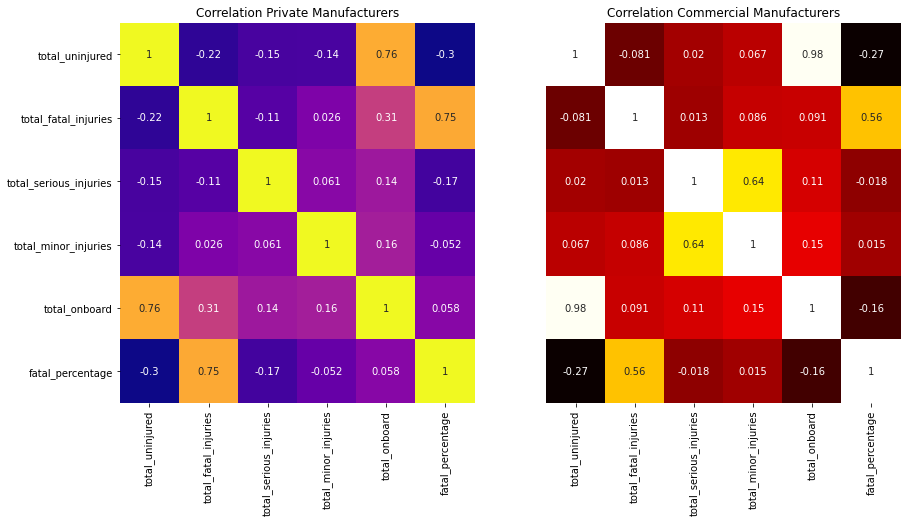

In [91]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(14,7))
sns.heatmap(df_private[['total_uninjured', 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_onboard', 'fatal_percentage']].corr(), cmap='plasma', 
            ax=ax1, annot=True, 
            cbar=False).set_title('Correlation Private Manufacturers')
sns.heatmap(df_commercial[['total_uninjured', 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_onboard', 'fatal_percentage']].corr(), cmap='hot', 
            ax=ax2, annot=True, cbar=False, 
            yticklabels=False).set_title('Correlation Commercial Manufacturers')

plt.show()

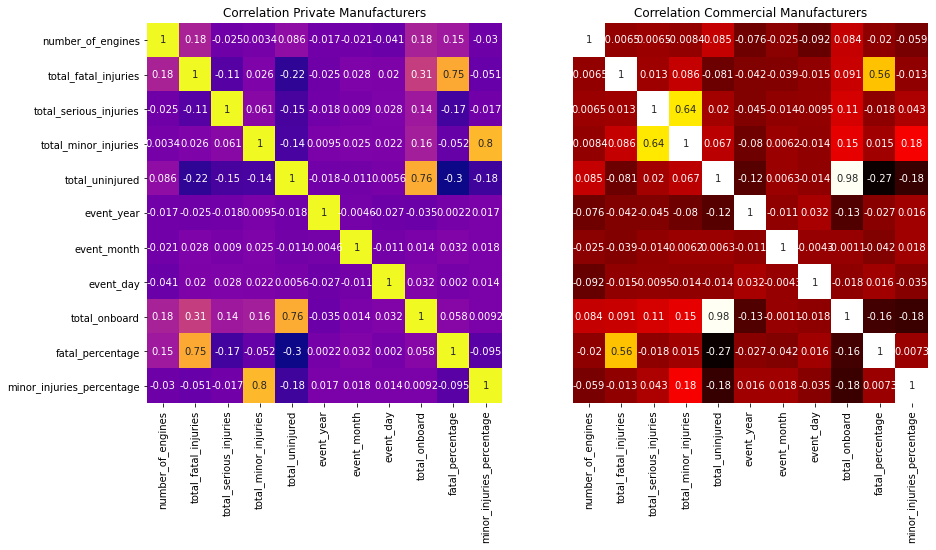

In [73]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(14,7))
sns.heatmap(df_private.corr(), cmap='plasma', 
            ax=ax1, annot=True, 
            cbar=False).set_title('Correlation Private Manufacturers')
sns.heatmap(df_commercial.corr(), cmap='hot', 
            ax=ax2, annot=True, cbar=False, 
            yticklabels=False).set_title('Correlation Commercial Manufacturers')

plt.show()


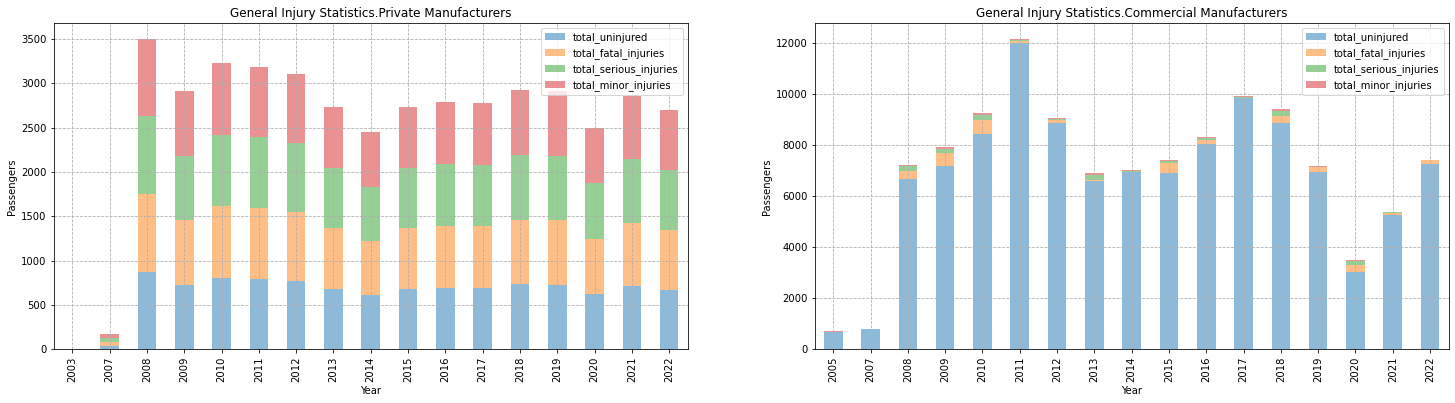

In [74]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(25,6))

df_private.groupby('event_year')[['total_uninjured', 'total_fatal_injuries', 'total_serious_injuries', 
                                  'total_minor_injuries']].agg('count').plot(kind='bar', 
                                    stacked=True, ax=ax1, alpha=0.5, title='General Injury Statistics.Private Manufacturers', 
                                    xlabel="Year", ylabel="Passengers")

df_commercial.groupby('event_year')[['total_uninjured', 'total_fatal_injuries', 'total_serious_injuries', 
                                     'total_minor_injuries']].agg('sum').plot(kind='bar',stacked=True, 
                                      ax=ax2, alpha=0.5, linestyle='--', title='General Injury Statistics.Commercial Manufacturers', 
                                      xlabel="Year", ylabel="Passengers")


ax1.grid(linestyle='--')
ax2.grid(linestyle='--');

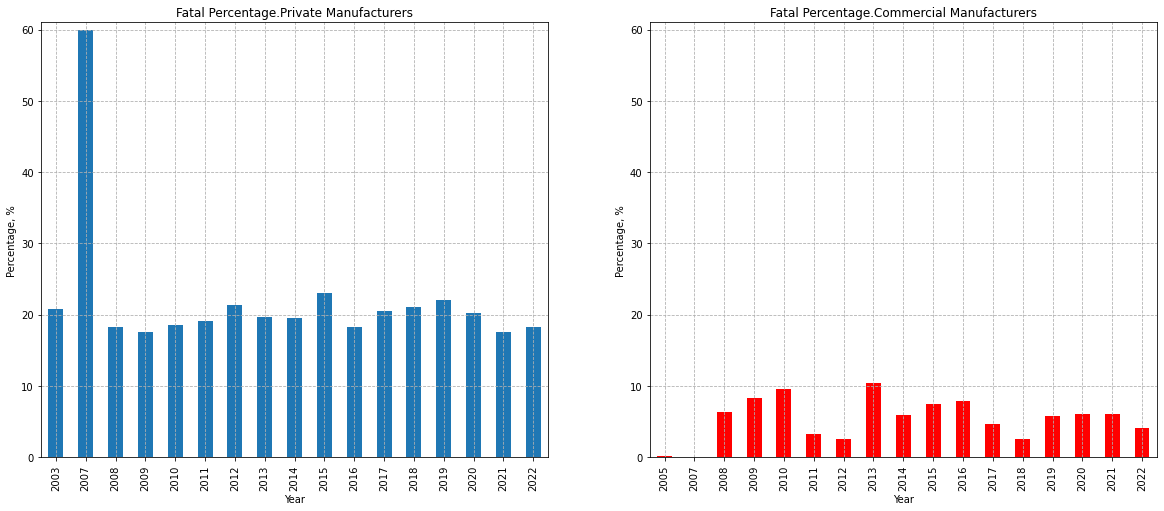

In [75]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))

df_private.groupby('event_year')['fatal_percentage'].agg('mean').plot(kind='bar', 
                                    ax=ax1, title='Fatal Percentage.Private Manufacturers', 
                                    xlabel="Year", ylabel="Percentage, %")

df_commercial.groupby('event_year')['fatal_percentage'].agg('mean').plot(kind='bar',
                                    ax=ax2, linestyle='--', color= 'r', title='Fatal Percentage.Commercial Manufacturers', 
                                    xlabel="Year", ylabel="Percentage, %")

ax1.set_ylim([0, 61])
ax2.set_ylim([0, 61])
ax1.grid(linestyle='--')
ax2.grid(linestyle='--');

In [76]:
df_private.groupby('event_year')['fatal_percentage'].agg('mean')

event_year
2003    20.833333
2007    59.920635
2008    18.211506
2009    17.537827
2010    18.531696
2011    19.162544
2012    21.402263
2013    19.613593
2014    19.607996
2015    23.104720
2016    18.285124
2017    20.539359
2018    21.018628
2019    22.062280
2020    20.249729
2021    17.556043
2022    18.209856
Name: fatal_percentage, dtype: float64

In [77]:
df_commercial.groupby('event_year')['fatal_percentage'].agg('mean')

event_year
2005     0.154321
2007     0.000000
2008     6.413293
2009     8.334768
2010     9.618117
2011     3.230122
2012     2.531646
2013    10.490150
2014     5.932203
2015     7.412359
2016     7.945425
2017     4.651163
2018     2.622818
2019     5.800757
2020     6.114676
2021     6.060606
2022     4.109589
Name: fatal_percentage, dtype: float64

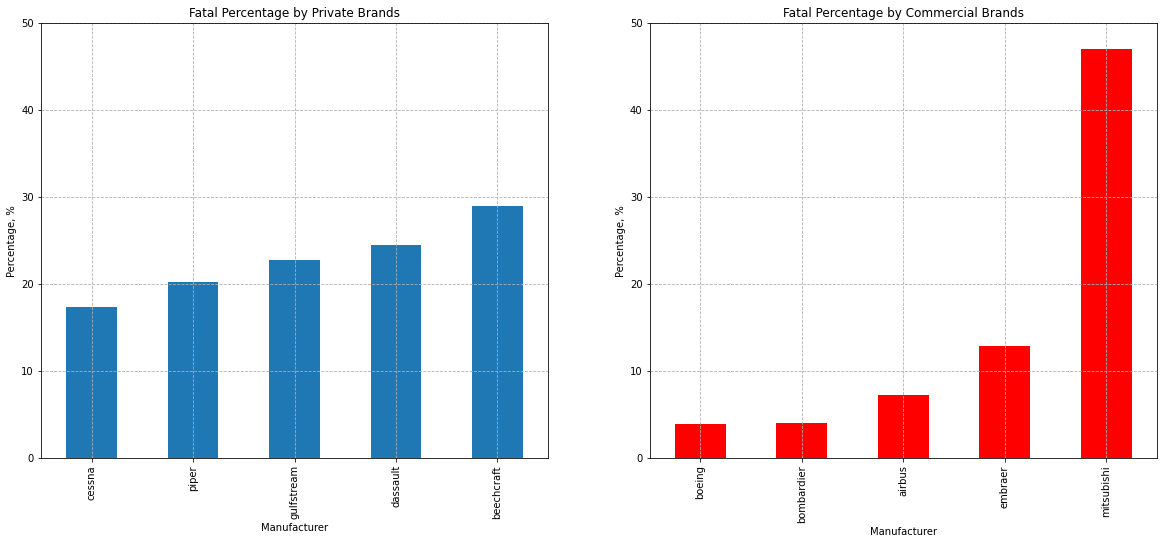

In [78]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))

df_private.groupby('make_top')['fatal_percentage'].agg('mean').sort_values().plot(kind='bar', 
                                    ax=ax1, title='Fatal Percentage by Private Brands', 
                                    xlabel="Manufacturer", ylabel="Percentage, %")

df_commercial.groupby('make_top')['fatal_percentage'].agg('mean').sort_values().plot(kind='bar',
                                    ax=ax2, linestyle='--', color = 'r', title='Fatal Percentage by Commercial Brands', 
                                    xlabel="Manufacturer", ylabel="Percentage, %")

ax1.set_ylim([0, 50])
ax2.set_ylim([0, 50])
ax1.grid(linestyle='--')
ax2.grid(linestyle='--');

In [79]:
df_private.groupby('make_top')['fatal_percentage'].agg('mean')

make_top
beechcraft    29.031133
cessna        17.409557
dassault      24.509804
gulfstream    22.751323
piper         20.283401
Name: fatal_percentage, dtype: float64

In [80]:
df_commercial.groupby('make_top')['fatal_percentage'].agg('mean')

make_top
airbus         7.212925
boeing         3.932475
bombardier     4.081633
embraer       12.845696
mitsubishi    47.058824
Name: fatal_percentage, dtype: float64

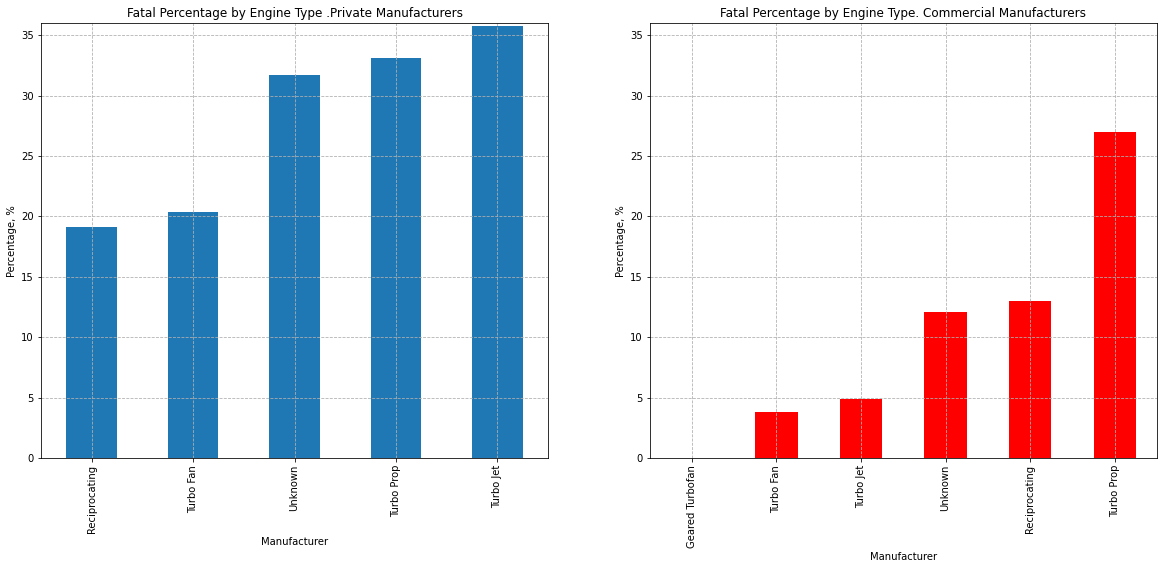

In [81]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))

df_private.groupby('engine_type')['fatal_percentage'].agg('mean').sort_values().plot(kind='bar', 
                                    ax=ax1, title='Fatal Percentage by Engine Type .Private Manufacturers', 
                                    xlabel="Manufacturer", ylabel="Percentage, %")

df_commercial.groupby('engine_type')['fatal_percentage'].agg('mean').sort_values().plot(kind='bar',
                                    ax=ax2, linestyle='--', color = 'r', title='Fatal Percentage by Engine Type. Commercial Manufacturers', 
                                    xlabel="Manufacturer", ylabel="Percentage, %")

ax1.set_ylim([0, 36])
ax2.set_ylim([0, 36])
ax1.grid(linestyle='--')
ax2.grid(linestyle='--');

In [82]:
df_commercial.groupby('engine_type')['fatal_percentage'].agg('mean').sort_values(ascending=False)

engine_type
Turbo Prop         26.948052
Reciprocating      12.980769
Unknown            12.070169
Turbo Jet           4.878049
Turbo Fan           3.817340
Geared Turbofan     0.000000
Name: fatal_percentage, dtype: float64

In [83]:
df_private.groupby('engine_type')['fatal_percentage'].agg('mean').sort_values(ascending=False)

engine_type
Turbo Jet        35.789474
Turbo Prop       33.099928
Unknown          31.720430
Turbo Fan        20.340476
Reciprocating    19.076752
Name: fatal_percentage, dtype: float64

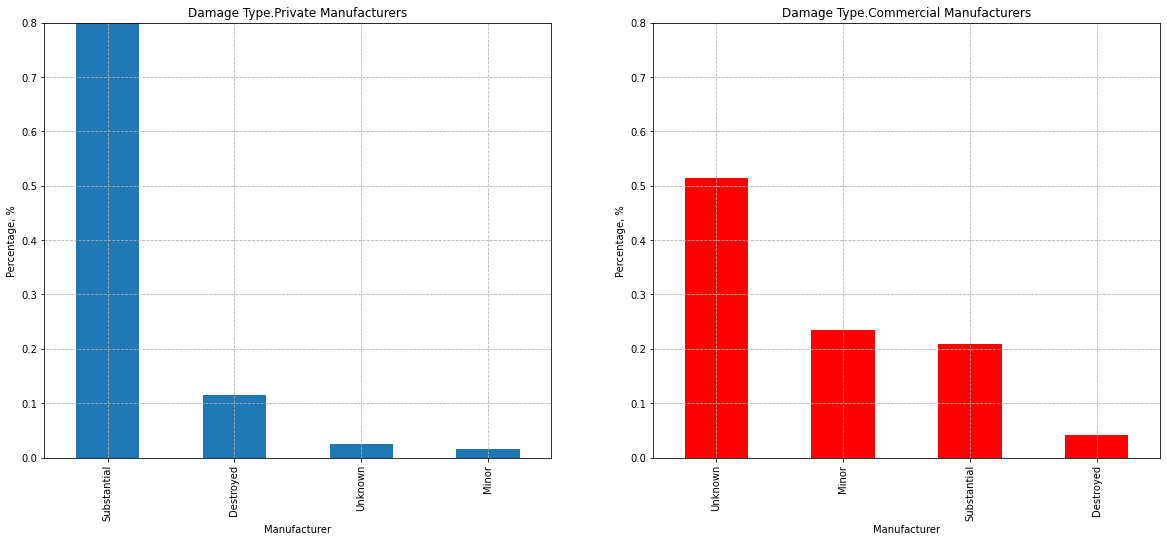

In [84]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))

df_private['aircraft_damage'].value_counts(normalize=True).plot(kind='bar', 
                                    ax=ax1, title='Damage Type.Private Manufacturers', 
                                    xlabel="Manufacturer", ylabel="Percentage, %")



df_commercial['aircraft_damage'].value_counts(normalize=True).plot(kind='bar', 
                                    ax=ax2, color = 'r', title='Damage Type.Commercial Manufacturers', 
                                    xlabel="Manufacturer", ylabel="Percentage, %")

ax1.set_ylim([0, 0.8])
ax2.set_ylim([0, 0.8])
ax1.grid(linestyle='--')
ax2.grid(linestyle='--');

In [85]:
df_private['aircraft_damage'].value_counts(normalize=True)

Substantial    0.843917
Destroyed      0.114301
Unknown        0.025768
Minor          0.016013
Name: aircraft_damage, dtype: float64

In [86]:
df_commercial['aircraft_damage'].value_counts(normalize=True)

Unknown        0.514156
Minor          0.234994
Substantial    0.209513
Destroyed      0.041336
Name: aircraft_damage, dtype: float64

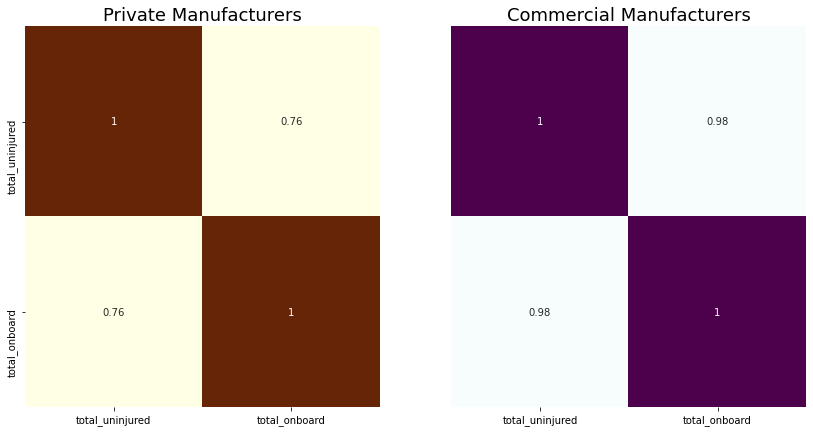

In [92]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(14,7))
sns.heatmap(df_private[['total_uninjured', 'total_onboard']].corr(), cmap='YlOrBr', 
            ax=ax1, annot=True, 
            cbar=False).set_title('Private Manufacturers', size =18)
sns.heatmap(df_commercial[['total_uninjured', 'total_onboard']].corr(), cmap='BuPu', 
            ax=ax2, annot=True, cbar=False, 
            yticklabels=False).set_title('Commercial Manufacturers', size=18)

plt.show()

In [88]:
df_clean.to_csv('data_tableau.csv', index=False)

## Summary